In [1]:
import db

In [2]:
#db.create_db()

In [3]:
import ripple_repository

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

golden cross: (0.17851140000000007, 0.17780265000000012, 0.179021, datetime.date(2017, 8, 7))
dead cross: (0.1743284000000001, 0.1752726500000001, 0.169991, datetime.date(2017, 8, 14))
golden cross: (0.18077580000000013, 0.1761380500000001, 0.239286, datetime.date(2017, 8, 22))
dead cross: (0.21630020000000022, 0.22006460000000008, 0.211518, datetime.date(2017, 9, 8))
golden cross: (0.1921284000000002, 0.18780075000000016, 0.193606, datetime.date(2017, 9, 29))
dead cross: (0.22650300000000012, 0.23783135000000016, 0.210549, datetime.date(2017, 10, 20))
golden cross: (0.2051578000000001, 0.20509015000000005, 0.20599, datetime.date(2017, 11, 6))
dead cross: (0.2415194000000002, 0.2462298000000002, 0.222823, datetime.date(2017, 12, 7))
golden cross: (0.2718796000000002, 0.2556731000000002, 0.373541, datetime.date(2017, 12, 12))
dead cross: (2.104, 2.2035, 2.04, datetime.date(2018, 1, 12))
golden cross: (1.0268855999999995, 1.024441900000001, 1.03, datetime.date(2018, 2, 13))
dead cross: (

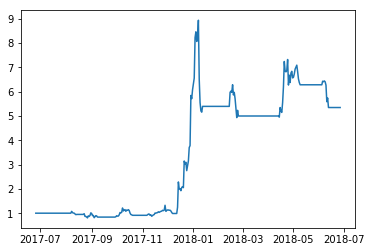

In [5]:
# Strategy1 : golden cross와 dead cross를 활용 - ma5와 ma20 비교
import math

(index, origin) = ripple_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

golden cross: (0.18210620000000008, 0.1790125500000001, 0.192586, datetime.date(2017, 8, 8))
dead cross: (0.1743284000000001, 0.1752726500000001, 0.169991, datetime.date(2017, 8, 14))
golden cross: (0.18077580000000013, 0.1761380500000001, 0.239286, datetime.date(2017, 8, 22))
dead cross: (0.21630020000000022, 0.22006460000000008, 0.211518, datetime.date(2017, 9, 8))
golden cross: (0.20073220000000017, 0.18642585000000017, 0.203318, datetime.date(2017, 10, 3))
dead cross: (0.22650300000000012, 0.23783135000000016, 0.210549, datetime.date(2017, 10, 20))
golden cross: (0.20791720000000008, 0.20479620000000004, 0.217437, datetime.date(2017, 11, 8))
dead cross: (0.2415194000000002, 0.2462298000000002, 0.222823, datetime.date(2017, 12, 7))
golden cross: (0.2718796000000002, 0.2556731000000002, 0.373541, datetime.date(2017, 12, 12))
dead cross: (2.104, 2.2035, 2.04, datetime.date(2018, 1, 12))
golden cross: (1.1139999999999992, 0.9878154000000011, 1.02, datetime.date(2018, 2, 21))
dead cross

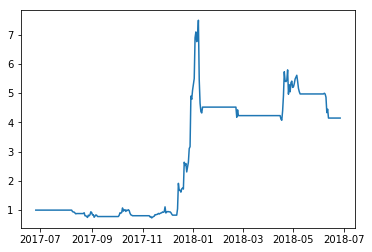

In [6]:
import math

(index, origin) = ripple_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_benefit = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    (ma5_price, ma20_price, close_price, _) = tuple
    if not bought and ma5_price > ma20_price and ma20_price > previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif bought and ma5_price < ma20_price:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (close_price / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (close_price / previous_close))
        else:
            benefits.append(benefits[-1])

            
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))
    
    previous_ma5 = ma5_price
    previous_ma20 = ma20_price
    previous_close = close_price

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

golden cross: (0.1989773333333332, 0.1970232, 0.190769, datetime.date(2017, 7, 14))
dead cross: (0.18738899999999983, 0.19050800000000004, 0.170589, datetime.date(2017, 7, 15))
golden cross: (0.17833166666666653, 0.170728, 0.168388, datetime.date(2017, 7, 19))
dead cross: (0.17976366666666652, 0.18117960000000002, 0.182608, datetime.date(2017, 7, 21))
golden cross: (0.18807433333333315, 0.1842658, 0.19332, datetime.date(2017, 7, 22))
dead cross: (0.18130933333333318, 0.18646120000000005, 0.173822, datetime.date(2017, 7, 26))
golden cross: (0.16984033333333315, 0.16906580000000004, 0.177053, datetime.date(2017, 8, 1))
dead cross: (0.1808843333333331, 0.18285200000000007, 0.179307, datetime.date(2017, 8, 11))
golden cross: (0.16856999999999978, 0.16441820000000013, 0.191918, datetime.date(2017, 8, 21))
dead cross: (0.2164543333333331, 0.2270952000000001, 0.212577, datetime.date(2017, 8, 26))
golden cross: (0.21535566666666647, 0.21529440000000016, 0.218564, datetime.date(2017, 8, 29))
de

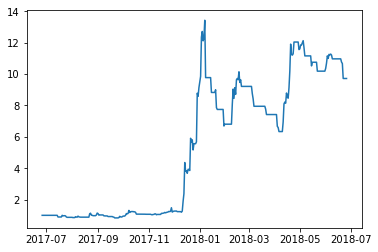

In [7]:
import math

(index, origin) = ripple_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma3'] = close_series.rolling(window=3).mean()
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma3 = -1
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma3'], data['ma5'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma3 <= previous_ma5:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma3 >= previous_ma5:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma3 = tuple[0]
    previous_ma5 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

buy: 2017-07-02
buy: 2017-07-05
buy: 2017-07-09
buy: 2017-07-12
buy: 2017-07-13
buy: 2017-07-17
buy: 2017-07-20
buy: 2017-07-22
buy: 2017-07-23
buy: 2017-07-29
buy: 2017-07-31
buy: 2017-08-01
buy: 2017-08-05
buy: 2017-08-08
buy: 2017-08-11
buy: 2017-08-12
buy: 2017-08-14
buy: 2017-08-18
buy: 2017-08-20
buy: 2017-08-21
buy: 2017-08-22
buy: 2017-08-23
buy: 2017-08-28
buy: 2017-08-30
buy: 2017-08-31
buy: 2017-09-10
buy: 2017-09-12
buy: 2017-09-15
buy: 2017-09-18
buy: 2017-09-23
buy: 2017-09-25
buy: 2017-09-26
buy: 2017-09-27
buy: 2017-09-30
buy: 2017-10-01
buy: 2017-10-04
buy: 2017-10-05
buy: 2017-10-07
buy: 2017-10-08
buy: 2017-10-13
buy: 2017-10-15
buy: 2017-10-16
buy: 2017-10-24
buy: 2017-10-29
buy: 2017-10-31
buy: 2017-11-02
buy: 2017-11-03
buy: 2017-11-06
buy: 2017-11-07
buy: 2017-11-08
buy: 2017-11-11
buy: 2017-11-14
buy: 2017-11-16
buy: 2017-11-19
buy: 2017-11-20
buy: 2017-11-22
buy: 2017-11-23
buy: 2017-11-25
buy: 2017-11-27
buy: 2017-11-28
buy: 2017-12-03
buy: 2017-12-08
buy: 201

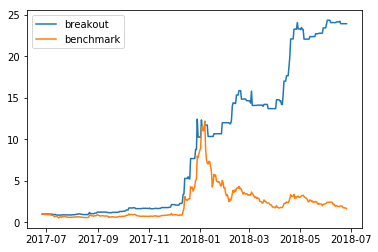

In [8]:
import math
(index, origin) = ripple_repository.get_data_as_lists()
previous_gap = -1
benefits = []
drawdowns = []
max_benefit = -1

for row in zip(origin['open'], origin['close'], origin['low'], origin['high'], index):
    open_price, close_price, low_price, high_price, date = row
    if previous_gap == -1:
        benefits.append(1)
    else:
        target_price = open_price + previous_gap
        if high_price >= target_price:
            print(f"buy: {date}")
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit * (close_price / target_price))
        else:
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit)
        
    previous_gap = (high_price - low_price) / 2
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))

data_frame = pd.DataFrame({
    'breakout': benefits,
    'benchmark': pd.Series(origin['close'], index) / origin['close'][0]
}, index)
data_frame.plot()

# series2 = pd.Series(drawdowns, index)
# series2.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

benchmark_drawdowns = []
max_benchmark = -1
for row in data_frame['benchmark']:
    if row > max_benchmark:
        max_benchmark = row
    benchmark_drawdowns.append(1 - (row / max_benchmark)) 

print(f"MDD: {max(benchmark_drawdowns) * 100}%")
print(f"benchmark CAGR: {(data_frame['benchmark'][-1] - 1) * 100}%")


In [9]:
import math

(index, origin) = ripple_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)

previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

KeyError: 'ma5'